# TUNVESTI – ETL Notebook
## IT300 – Business Intelligence

This notebook performs data cleaning and exploratory data analysis
on historical BVMT stock data (2010–2022) to prepare it for BI dashboards.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [2]:
df = pd.read_csv("historical_stocks_2010_2022.csv")
df.head()


,Ticker,Date,Open,High,Low,Close,Volume
0,AB,2010-01-04,26.500,26.650,26.50,26.650,736
1,AB,2010-01-05,26.650,27.350,26.50,27.200,14632
2,AB,2010-01-06,27.250,27.995,27.20,27.500,11350
3,AB,2010-01-07,27.500,28.150,27.30,28.005,12210
4,AB,2010-01-08,28.395,28.395,27.65,28.000,1108


In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187987 entries, 0 to 187986
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Ticker  187987 non-null  object 
 1   Date    187987 non-null  object 
 2   Open    187965 non-null  float64
 3   High    187965 non-null  float64
 4   Low     187960 non-null  float64
 5   Close   187965 non-null  float64
 6   Volume  187987 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 10.0+ MB


Ticker     0
Date       0
Open      22
High      22
Low       27
Close     22
Volume     0
dtype: int64

In [4]:
price_cols = ['Open', 'High', 'Low', 'Close']
df[price_cols] = df[price_cols].fillna(df[price_cols].median())


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

df = df[
    (df['Open'] > 0) &
    (df['High'] > 0) &
    (df['Low'] > 0) &
    (df['Close'] > 0)
]

df = df[df['Volume'] >= 0]


In [6]:
cols = ['Open', 'High', 'Low', 'Close', 'Volume']

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~(
    (df[cols] < (Q1 - 1.5 * IQR)) |
    (df[cols] > (Q3 + 1.5 * IQR))
).any(axis=1)]


In [7]:
df = df.sort_values(['Ticker', 'Date'])
df['Daily_Return'] = df.groupby('Ticker')['Close'].pct_change()


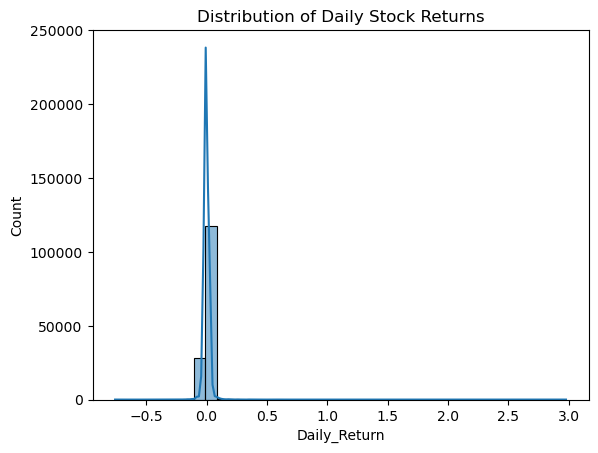

In [8]:
sns.histplot(df['Daily_Return'].dropna(), bins=40, kde=True)
plt.title("Distribution of Daily Stock Returns")
plt.show()


In [9]:
df.to_csv("clean_historical_stocks_2010_2022.csv", index=False)
